In [9]:
import tensorflow.keras as keras
from keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words = 10000)

C:\Users\Aryan Raj\anaconda3\envs\new_env\lib\site-packages\keras\datasets\imdb.py:101: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
C:\Users\Aryan Raj\anaconda3\envs\new_env\lib\site-packages\keras\datasets\imdb.py:102: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_test, y_test = np.array(xs[idx:]), np.array(labels[idx:])


In [10]:
#train_data[0]    - Gives us training data

In [11]:
#test_data[0]    - Gives us test cases

In [12]:
train_labels[0]

1

In [13]:
max([max(sequence) for sequence in train_data])

9999

In [14]:
word_index = imdb.get_word_index()
reverse_word_index = dict(
[(value, key) for (key, value) in word_index.items()])
decoded_review = ' '.join(
[reverse_word_index.get(i - 3, '?') for i in train_data[0]])

In [15]:
#print(reverse_word_index)    - Just some fun. Prints words for given index

In [16]:
import numpy as np
def vectorize_sequences(sequences, dimension = 10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [17]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [18]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [19]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [20]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

In [21]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [22]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

history = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 8s 562us/step - loss: 0.5167 - acc: 0.7989 - val_loss: 0.3934 - val_acc: 0.8665
Epoch 2/20
15000/15000 [==============================] - 4s 295us/step - loss: 0.3130 - acc: 0.8997 - val_loss: 0.3085 - val_acc: 0.8861
Epoch 3/20
15000/15000 [==============================] - 2s 147us/step - loss: 0.2312 - acc: 0.9249 - val_loss: 0.2833 - val_acc: 0.8884
Epoch 4/20
15000/15000 [==============================] - 2s 139us/step - loss: 0.1833 - acc: 0.9402 - val_loss: 0.2738 - val_acc: 0.8907
Epoch 5/20
15000/15000 [==============================] - 2s 136us/step - loss: 0.1495 - acc: 0.9515 - val_loss: 0.2790 - val_acc: 0.8870
Epoch 6/20
15000/15000 [==============================] - 2s 134us/step - loss: 0.1249 - acc: 0.9602 - val_loss: 0.2933 - val_acc: 0.8858
Epoch 7/20
15000/15000 [==============================] - 2s 134us/step - loss: 0.1047 - acc: 0.9688 - val_loss: 0.3263 - 

In [23]:
history_dict = history.history
history_dict.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

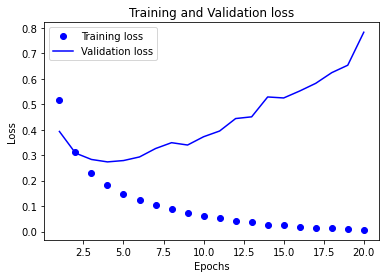

In [24]:
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(history_dict['acc']) + 1)

plt.plot(epochs, loss_values, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss_values, 'b', label = 'Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

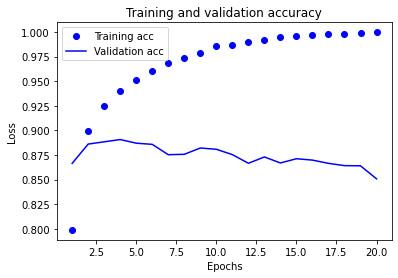

In [25]:
plt.clf()
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']
acc = history_dict['acc']
val_acc = history_dict['val_acc']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [26]:
# method 2

In [27]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop',
loss='binary_crossentropy',
metrics=['accuracy'])
model.fit(x_train, y_train, epochs=5, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/5
25000/25000 [==============================] - 2s 90us/step - loss: 0.4536 - accuracy: 0.8238 0s - loss: 0.5
Epoch 2/5
25000/25000 [==============================] - 2s 85us/step - loss: 0.2593 - accuracy: 0.9081
Epoch 3/5
25000/25000 [==============================] - 2s 85us/step - loss: 0.2012 - accuracy: 0.9278
Epoch 4/5
25000/25000 [==============================] - 2s 85us/step - loss: 0.1683 - accuracy: 0.9402
Epoch 5/5
25000/25000 [==============================] - 12s 495us/step


In [28]:
model.predict(x_test)

array([[0.20974939],
       [0.99995184],
       [0.9112736 ],
       ...,
       [0.17368972],
       [0.11682561],
       [0.88759875]], dtype=float32)

In [29]:
# Further experiments

In [30]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop',
             loss='mse',
             metrics=['accuracy'])
model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
25000/25000 [==============================] - 5s 220us/step - loss: 0.1524 - accuracy: 0.8131
Epoch 2/4
25000/25000 [==============================] - 4s 167us/step - loss: 0.0795 - accuracy: 0.9105
Epoch 3/4
25000/25000 [==============================] - 2s 93us/step - loss: 0.0592 - accuracy: 0.9314
Epoch 4/4
25000/25000 [==============================] - 7s 281us/step


In [31]:
model.predict(x_test)

array([[0.2214673 ],
       [0.9906149 ],
       [0.74163383],
       ...,
       [0.25711715],
       [0.12215405],
       [0.62133706]], dtype=float32)